<a href="https://colab.research.google.com/github/priyanshu7466/Python/blob/main/Deep_Learning/GPU_Benchmarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.__version__

'2.15.0'

In [5]:
tf.test.is_built_with_cuda()

True

In [6]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [7]:
len(X_train)

50000

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
def plot_sample(index):
  plt.figure(figsize = (10,1))
  plt.imshow(X_train[index])

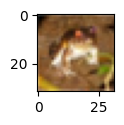

In [11]:
plot_sample(0)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

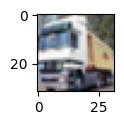

In [13]:
plot_sample(1)

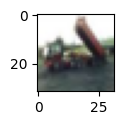

In [14]:
plot_sample(2)

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

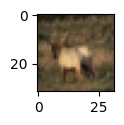

In [16]:
plot_sample(3)

In [17]:
classes[y_train[3][0]]

'deer'

In [18]:
X_test.shape

(10000, 32, 32, 3)

In [19]:
y_test.shape

(10000, 1)

In [20]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [21]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [22]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer = 'SGD',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_scaled,y_train_categorical,epochs=1)

1563/1563 [==============================] - 9s 5ms/step - loss: 1.8122 - accuracy: 0.3500


In [24]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 1s 2ms/step


'frog'

In [25]:
classes[y_test[0][0]]

'cat'

In [26]:
def get_model():
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
  ])

  model.compile(
    optimizer = 'SGD',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
  )
  model.fit(X_train_scaled,y_train_categorical,epochs=1)
  return model

In [40]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 158s 101ms/step - loss: 1.6237 - accuracy: 0.4259
6min 48s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [27]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 7s 5ms/step - loss: 1.6223 - accuracy: 0.4274
22.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Exercise

In [3]:
!nvidia-smi

Wed Dec 27 12:55:02 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

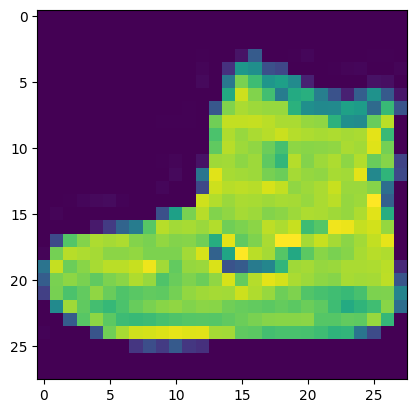

In [31]:
plt.imshow(train_images[0])

In [32]:
train_labels[0]

9

In [37]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [33]:
class_names[train_labels[0]]

'Ankle boot'

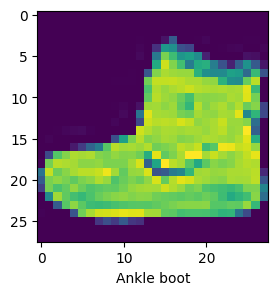

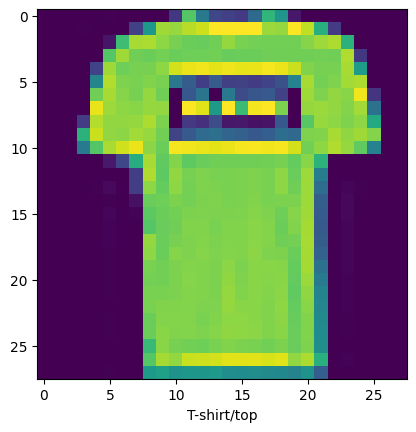

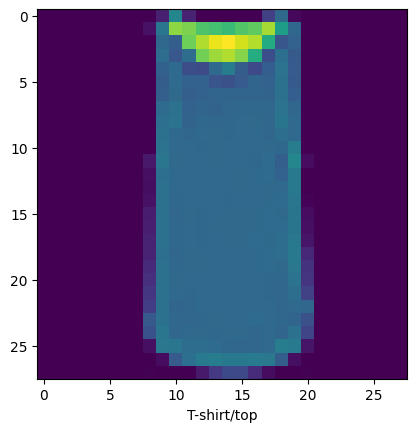

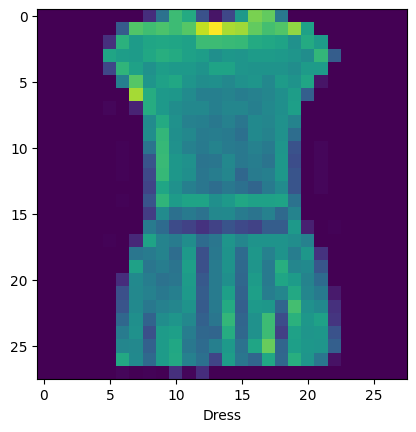

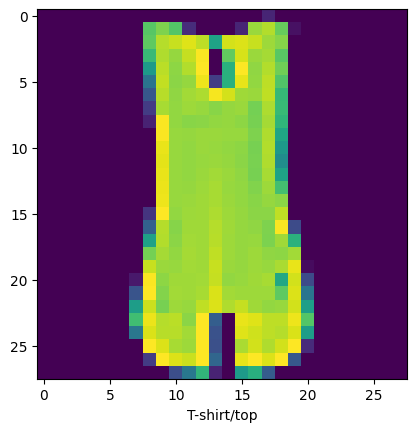

In [34]:
plt.figure(figsize=(3,3))
for i in range(5):
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
  plt.show()

In [6]:
train_images_scaled = train_images/255
test_images_scaled = test_images/255

In [7]:
def get_model(hidden_layers=1):
  layers = [
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(50,activation='relu'),
      keras.layers.Dense(10,activation='sigmoid')
  ]
  model = keras.Sequential(layers)

  model.compile(
      optimizer = 'adam',
      loss = 'sparse_categorical_crossentropy',
      metrics = ['accuracy']
  )

  return model

In [40]:
model = get_model(1)
model.fit(train_images_scaled,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5308 - accuracy: 0.8153
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3999 - accuracy: 0.8577
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3645 - accuracy: 0.8691
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3411 - accuracy: 0.8758
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3225 - accuracy: 0.8832


In [43]:
np.argmax(model.predict(test_images_scaled)[2])

313/313 [==============================] - 0s 1ms/step


1

In [42]:
test_labels[2]

1

In [44]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [45]:
%%timeit -n1 -r1
with tf.device(':/GPU:0'):
  cpu_model = get_model(1)
  cpu_model.fit(train_images_scaled,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5171 - accuracy: 0.8203
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3960 - accuracy: 0.8605
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3582 - accuracy: 0.8720
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3349 - accuracy: 0.8778
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3165 - accuracy: 0.8839
21.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
%%timeit -n1 -r1
with tf.device(':/GPU:0'):
  cpu_model = get_model(5)
  cpu_model.fit(train_images_scaled,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5332 - accuracy: 0.8166
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4092 - accuracy: 0.8559
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3699 - accuracy: 0.8691
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3451 - accuracy: 0.8760
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3288 - accuracy: 0.8820
26.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
